In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 10.0)
matplotlib.use("MacOSX")

import pickle
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

import covid19sim
from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import datetime
import sys
#sys.path.append("../plots")
# from plot_rt import PlotRt
from utils import plot_intervention

%matplotlib inline


## Load data

In [29]:
filenames = [
    "/Users/xxx/Downloads/" + "tracker_data_n_1000_seed_0_20200521-173308_.pkl"
]
for i, filename in enumerate(filenames):
    with open(filename, "rb") as f:
        data = pickle.load(f)
print(data.keys())
bob = "human:8"
bob_timestamp = datetime.datetime(2020, 3, 7, 0, 0)

dict_keys(['intervention_day', 'intervention', 'risk_model', 'expected_mobility', 'serial_interval', 'mobility', 'n_init_infected', 'contacts', 'cases_per_day', 'ei_per_day', 'r_0', 'R', 'n_humans', 's', 'e', 'i', 'r', 'avg_infectiousness_per_day', 'risk_precision_global', 'risk_precision', 'human_monitor', 'infection_monitor', 'infector_infectee_update_messages', 'risk_attributes', 'feelings', 'rec_feelings', 'outside_daily_contacts', 'test_monitor', 'bob_messages', 'bob_encounters'])


In [30]:
monitor = data["human_monitor"]

In [31]:
print("Human Monitor Sample Value")
list(monitor.values())[0][0]

Human Monitor Sample Value


{'infection_timestamp': None,
 'n_infectious_contacts': 0,
 'risk': 0.01,
 'risk_level': 1,
 'rec_level': -1,
 'state': 0,
 'test_result': None,
 'n_symptoms': 0,
 'test_orders': defaultdict(<function covid19sim.simulator.<lambda>()>, {}),
 'symptom_orders': defaultdict(<function covid19sim.simulator.<lambda>()>, {})}

### plots

* plot 1: for each person whose risk changes, how far away are they from Bob
* plot 2: for each such distance, what is the distribution (incl. average) risk change
* plot 3: for each

## Risk attributes

In [20]:
ra = data["risk_attributes"]

In [21]:
ra_post_bob = [r for r in ra if r["timestamp"] >= bob_timestamp]

In [22]:
print("Sample Risk Attribute (after Bob)")
ra_post_bob[0]

Sample Risk Attribute (after Bob)


{'risk': 0.0015209408,
 'risk_level': 1,
 'rec_level': 0,
 'exposed': False,
 'infectious': False,
 'symptoms': 0,
 'test': None,
 'recovered': False,
 'timestamp': datetime.datetime(2020, 3, 7, 0, 0),
 'test_recommended': False,
 'name': 'human:1',
 'order_1_is_exposed': False,
 'order_1_is_presymptomatic': False,
 'order_1_is_infectious': False,
 'order_1_is_symptomatic': False,
 'order_1_is_tested': False}

In [23]:
ra_per_timestamp = defaultdict(list)
for r in ra_post_bob:
    ra_per_timestamp[r["timestamp"]] += [r]

**For each time, people with risk level > 1**

In [24]:
for k, v in ra_per_timestamp.items():
    print(str(k))
    for r in sorted(v, key=lambda x: x["name"]):
        if r["risk_level"] > 1:
            print(r["name"], r["risk_level"])


2020-03-07 00:00:00
human:7 2
human:8 14
2020-03-07 01:00:00
human:6 2
human:7 2
human:8 14
2020-03-07 02:00:00
human:6 2
human:7 2
human:8 14
2020-03-07 03:00:00
human:5 2
human:6 2
human:7 2
human:8 14
2020-03-07 04:00:00
human:5 2
human:6 2
human:7 2
human:8 14
2020-03-07 05:00:00
human:5 2
human:6 2
human:7 2
human:8 14
human:9 2
2020-03-07 06:00:00
human:5 2
human:6 2
human:7 2
human:8 14
human:9 2
2020-03-07 07:00:00
human:5 2
human:6 2
human:7 2
human:8 14
human:9 2
2020-03-07 08:00:00
human:5 2
human:6 2
human:7 2
human:8 14
human:9 2
2020-03-07 09:00:00
human:5 2
human:6 2
human:7 2
human:8 14
human:9 2
2020-03-07 10:00:00
human:5 2
human:6 2
human:7 2
human:8 14
human:9 2
2020-03-07 11:00:00
human:5 2
human:6 2
human:7 2
human:8 14
human:9 2
2020-03-07 12:00:00
human:5 2
human:6 2
human:7 2
human:8 14
human:9 2
2020-03-07 13:00:00
human:5 2
human:6 2
human:7 2
human:8 14
human:9 2
2020-03-07 14:00:00
human:5 2
human:6 2
human:7 2
human:8 14
human:9 2
2020-03-07 15:00:00
human

2020-03-12 08:00:00
human:10 2
human:5 7
human:6 8
human:7 6
human:8 14
human:9 8
2020-03-12 09:00:00
human:10 2
human:5 7
human:6 8
human:7 6
human:8 14
human:9 8
2020-03-12 10:00:00
human:10 2
human:5 7
human:6 8
human:7 6
human:8 14
human:9 8
2020-03-12 11:00:00
human:10 2
human:5 7
human:6 8
human:7 6
human:8 14
human:9 8
2020-03-12 12:00:00
human:10 2
human:5 7
human:6 8
human:7 6
human:8 14
human:9 8
2020-03-12 13:00:00
human:10 2
human:5 7
human:6 8
human:7 6
human:8 14
human:9 8
2020-03-12 14:00:00
human:10 2
human:5 7
human:6 8
human:7 6
human:8 14
human:9 8
2020-03-12 15:00:00
human:10 2
human:5 7
human:6 8
human:7 6
human:8 14
human:9 8
2020-03-12 16:00:00
human:10 2
human:5 7
human:6 8
human:7 6
human:8 14
human:9 8
2020-03-12 17:00:00
human:10 2
human:5 7
human:6 8
human:7 6
human:8 14
human:9 8
2020-03-12 18:00:00
human:10 2
human:5 7
human:6 8
human:7 6
human:8 14
human:9 8
2020-03-12 19:00:00
human:10 2
human:5 7
human:6 8
human:7 6
human:8 14
human:9 8
2020-03-12 20:00

human:9 14
2020-03-15 03:00:00
human:1 2
human:10 6
human:11 7
human:13 5
human:17 5
human:18 5
human:2 4
human:22 2
human:24 3
human:26 5
human:3 4
human:30 3
human:31 7
human:33 4
human:34 6
human:35 5
human:37 6
human:38 6
human:39 3
human:5 6
human:50 2
human:51 2
human:59 3
human:6 7
human:60 2
human:68 2
human:69 2
human:7 7
human:70 2
human:79 2
human:8 14
human:84 5
human:85 5
human:87 6
human:88 5
human:9 14
2020-03-15 04:00:00
human:1 2
human:10 6
human:11 7
human:12 2
human:13 6
human:17 5
human:18 5
human:19 2
human:2 4
human:22 2
human:24 3
human:26 5
human:3 4
human:30 3
human:31 7
human:33 4
human:34 6
human:35 5
human:37 6
human:38 6
human:39 3
human:5 6
human:50 2
human:51 2
human:59 3
human:6 7
human:60 2
human:68 2
human:69 2
human:7 7
human:70 2
human:78 2
human:79 2
human:8 14
human:84 5
human:85 5
human:87 6
human:88 5
human:9 14
2020-03-15 05:00:00
human:1 2
human:10 8
human:11 7
human:12 2
human:13 6
human:17 5
human:18 5
human:19 2
human:2 4
human:22 2
human:24

human:79 3
human:8 14
human:84 5
human:85 5
human:87 7
human:88 5
human:9 14
2020-03-15 23:00:00
human:1 3
human:10 8
human:11 9
human:12 2
human:13 6
human:17 5
human:18 5
human:19 3
human:2 5
human:22 5
human:24 3
human:26 3
human:3 4
human:30 2
human:31 6
human:32 2
human:33 5
human:34 7
human:35 5
human:37 6
human:38 8
human:39 5
human:4 3
human:5 6
human:59 2
human:6 7
human:60 3
human:67 2
human:68 2
human:69 2
human:7 7
human:70 2
human:78 2
human:79 3
human:8 14
human:84 5
human:85 5
human:87 7
human:88 5
human:9 14
2020-03-16 00:00:00
human:1 3
human:10 8
human:11 9
human:12 2
human:13 6
human:17 5
human:18 5
human:19 3
human:2 5
human:22 5
human:24 3
human:26 3
human:3 4
human:30 2
human:31 6
human:32 2
human:33 5
human:34 7
human:35 5
human:37 6
human:38 8
human:39 3
human:4 3
human:5 6
human:59 2
human:6 7
human:60 3
human:67 2
human:68 2
human:69 2
human:7 6
human:70 2
human:78 2
human:79 3
human:8 14
human:84 5
human:85 5
human:87 7
human:88 5
human:9 14
2020-03-16 01:00:

human:69 3
human:7 6
human:70 5
human:76 2
human:77 3
human:78 5
human:79 7
human:8 14
human:80 2
human:84 6
human:85 6
human:87 6
human:88 6
human:9 14
2020-03-17 04:00:00
human:1 5
human:10 9
human:11 7
human:12 3
human:13 8
human:14 3
human:15 2
human:16 4
human:17 6
human:18 6
human:19 5
human:2 6
human:21 2
human:22 5
human:24 3
human:25 2
human:26 3
human:28 2
human:29 2
human:3 6
human:30 2
human:31 7
human:32 3
human:33 6
human:34 6
human:35 6
human:36 2
human:37 6
human:38 8
human:39 5
human:4 2
human:44 2
human:46 2
human:48 2
human:5 5
human:50 2
human:51 3
human:59 5
human:6 6
human:60 6
human:62 4
human:64 2
human:66 2
human:67 2
human:68 5
human:69 3
human:7 6
human:70 5
human:75 2
human:76 2
human:77 3
human:78 5
human:79 7
human:8 14
human:80 2
human:84 6
human:85 6
human:87 6
human:88 6
human:9 14
2020-03-17 05:00:00
human:1 5
human:10 9
human:11 7
human:12 3
human:13 8
human:14 3
human:15 2
human:16 4
human:17 6
human:18 6
human:19 5
human:2 6
human:21 2
human:22 5
hu

human:20 2
human:21 3
human:22 6
human:23 2
human:24 5
human:25 5
human:26 5
human:27 5
human:28 5
human:29 3
human:3 7
human:30 5
human:31 10
human:32 5
human:33 7
human:34 7
human:35 7
human:36 5
human:37 7
human:38 8
human:39 7
human:4 3
human:44 2
human:46 4
human:47 2
human:48 3
human:50 2
human:51 5
human:52 2
human:58 2
human:59 5
human:6 5
human:60 6
human:62 3
human:64 2
human:66 3
human:67 3
human:68 5
human:69 3
human:7 5
human:70 6
human:71 2
human:72 5
human:73 2
human:75 3
human:76 5
human:77 3
human:78 5
human:79 8
human:80 2
human:84 7
human:85 7
human:87 7
human:88 7
human:9 14
human:92 2
2020-03-18 10:00:00
human:1 6
human:10 9
human:11 9
human:12 5
human:13 9
human:14 5
human:15 5
human:16 6
human:17 6
human:18 7
human:19 5
human:2 8
human:20 2
human:21 3
human:22 6
human:23 2
human:24 5
human:25 5
human:26 5
human:27 5
human:28 5
human:29 3
human:3 7
human:30 5
human:31 10
human:32 5
human:33 7
human:34 7
human:35 7
human:36 5
human:37 7
human:38 8
human:39 7
human:

human:15 6
human:16 8
human:17 7
human:18 8
human:19 6
human:2 10
human:20 5
human:21 5
human:22 6
human:23 3
human:24 4
human:25 7
human:26 5
human:27 5
human:28 6
human:29 4
human:3 9
human:30 5
human:31 10
human:32 6
human:33 8
human:34 8
human:35 8
human:36 5
human:37 9
human:38 8
human:39 8
human:4 5
human:44 2
human:46 5
human:47 3
human:48 6
human:50 2
human:51 5
human:52 3
human:53 2
human:58 3
human:59 3
human:6 5
human:60 6
human:61 2
human:62 5
human:63 2
human:64 5
human:66 3
human:67 4
human:68 5
human:69 3
human:7 5
human:70 6
human:71 3
human:72 4
human:73 2
human:75 3
human:76 6
human:77 3
human:78 6
human:79 7
human:80 3
human:82 3
human:83 3
human:84 8
human:85 8
human:87 9
human:88 7
human:89 3
human:9 14
human:92 2
2020-03-19 05:00:00
human:1 7
human:10 9
human:11 8
human:12 6
human:13 9
human:14 7
human:15 6
human:16 8
human:17 7
human:18 8
human:19 6
human:2 10
human:20 5
human:21 5
human:22 6
human:23 3
human:24 4
human:25 7
human:26 5
human:27 6
human:28 6
human

human:48 6
human:50 2
human:51 6
human:52 4
human:53 2
human:58 4
human:59 5
human:6 5
human:60 7
human:61 2
human:62 6
human:63 2
human:64 5
human:66 4
human:67 5
human:68 6
human:69 5
human:7 5
human:70 6
human:71 3
human:72 7
human:73 2
human:75 4
human:76 7
human:77 5
human:78 6
human:79 8
human:80 4
human:81 2
human:82 5
human:83 3
human:84 8
human:85 8
human:87 9
human:88 9
human:89 3
human:9 14
human:92 3
2020-03-19 22:00:00
human:1 7
human:10 9
human:11 9
human:12 6
human:13 9
human:14 7
human:15 6
human:16 8
human:17 7
human:18 8
human:19 6
human:2 10
human:20 5
human:21 5
human:22 7
human:23 4
human:24 5
human:25 7
human:26 6
human:27 6
human:28 6
human:29 5
human:3 8
human:30 6
human:31 10
human:32 7
human:33 8
human:34 7
human:35 8
human:36 6
human:37 9
human:38 8
human:39 9
human:4 5
human:46 6
human:47 4
human:48 6
human:50 2
human:51 6
human:52 4
human:53 2
human:58 4
human:59 5
human:6 5
human:60 6
human:61 2
human:62 6
human:63 2
human:64 5
human:66 4
human:67 5
human:

human:28 7
human:29 5
human:3 9
human:30 8
human:31 10
human:32 8
human:33 8
human:34 8
human:35 9
human:36 8
human:37 10
human:38 9
human:39 10
human:4 6
human:42 2
human:43 2
human:44 2
human:46 5
human:47 5
human:48 7
human:49 2
human:50 3
human:51 6
human:52 6
human:53 3
human:58 5
human:59 6
human:6 3
human:60 6
human:61 4
human:62 6
human:63 4
human:64 5
human:66 5
human:67 6
human:68 6
human:69 5
human:7 3
human:70 6
human:71 4
human:72 8
human:73 3
human:75 5
human:76 8
human:77 5
human:78 7
human:79 8
human:80 5
human:81 4
human:82 6
human:83 4
human:84 9
human:85 9
human:86 2
human:87 10
human:88 10
human:89 2
human:9 14
human:91 2
human:92 4
human:98 2
2020-03-20 08:00:00
human:1 8
human:10 9
human:11 9
human:12 8
human:13 9
human:14 8
human:15 7
human:16 8
human:17 7
human:18 9
human:19 7
human:2 10
human:20 6
human:21 6
human:22 8
human:23 4
human:24 5
human:25 8
human:26 6
human:27 7
human:28 7
human:29 5
human:3 9
human:30 8
human:31 10
human:32 8
human:33 8
human:34 8
h

human:67 6
human:68 6
human:69 5
human:7 3
human:70 6
human:71 5
human:72 9
human:73 3
human:75 5
human:76 9
human:77 5
human:78 7
human:79 8
human:80 6
human:81 3
human:82 6
human:83 5
human:84 9
human:85 9
human:86 2
human:87 10
human:88 10
human:89 2
human:9 14
human:90 2
human:91 2
human:92 4
human:97 2
human:98 2
2020-03-20 21:00:00
human:1 8
human:10 9
human:11 9
human:12 8
human:13 9
human:14 9
human:15 7
human:16 9
human:17 7
human:18 9
human:19 7
human:2 10
human:20 6
human:21 6
human:22 8
human:23 5
human:24 5
human:25 8
human:26 6
human:27 7
human:28 7
human:29 5
human:3 9
human:30 8
human:31 11
human:32 8
human:33 8
human:34 8
human:35 9
human:36 8
human:37 9
human:38 9
human:39 10
human:4 6
human:42 2
human:43 2
human:44 2
human:45 2
human:46 5
human:47 5
human:48 8
human:49 2
human:50 5
human:51 7
human:52 6
human:53 3
human:56 2
human:58 5
human:59 6
human:6 3
human:60 7
human:61 4
human:62 7
human:63 4
human:64 6
human:66 5
human:67 6
human:68 6
human:69 5
human:7 3
hum

In [25]:
n_message_per_day = {}
for ts, ras in ra_per_timestamp.items():
    n_message_per_day[ts] = len([1 for r in ras if r["risk_level"] > 1])

In [26]:
b = plt.bar(n_message_per_day.keys(), n_message_per_day.values())
t = plt.title("Number of messages per hour")

## Order distribution

In [27]:
encs = data["bob_encounters"]
print("Humans who have had encounters:", len(encs))

KeyError: 'bob_encounters'

`encs` is all the encounters that happened as `{"human:k" : {date: list(encounter)}}`

In [172]:
print("Sample Encounter:")
print([k for k in encs][0], "@", [k for e in encs for k in encs[e]][0], ":\n")
print("\n".join(map(str, list(list(encs.values())[0].values())[1])))

Sample Encounter:
human:2 @ 2020-03-04 00:00:00 :

[2, 0, 5, 'human:55']
[7, 0, 5, 'human:54']
[2, 0, 5, 'human:55']
[7, 0, 5, 'human:54']
[2, 0, 5, 'human:55']
[7, 1, 5, 'human:54']
[2, 0, 5, 'human:55']
[7, 1, 5, 'human:54']
[2, 0, 5, 'human:55']
[7, 1, 5, 'human:54']
[2, 0, 5, 'human:55']
[7, 1, 5, 'human:54']
[2, 1, 5, 'human:55']
[7, 1, 5, 'human:54']
[2, 1, 5, 'human:55']
[7, 1, 5, 'human:54']
[2, 1, 5, 'human:55']
[7, 1, 5, 'human:54']
[2, 1, 5, 'human:55']
[7, 1, 5, 'human:54']
[2, 1, 5, 'human:55']
[7, 1, 5, 'human:54']
[2, 1, 5, 'human:55']
[7, 1, 5, 'human:54']


In [173]:
ra_post_bob
ra_per_name_per_ts = defaultdict(dict)  # {human_name: {timestamp: risk_attribute }}
for r in ra_post_bob:
    if r["risk_level"] > 1:
        ra_per_name_per_ts[r["name"]][r["timestamp"]] = r

In [176]:
all_humans = set(encs.keys())
known = set([bob])
orders = [set([bob])] # list[idx: list[name]]
stop = False
for order in range(1, 1000):
    if stop:
            break
    current = set()
    prev = set(orders[order-1])
    for h, dic in encs.items():
        if stop:
            break
        for d, l in dic.items():
            if stop:
                break

            for contact in l:
                if contact[-1] in prev and h not in known:
                    current.add(h)
                    known.add(h)
                if all_humans == known:
                    stop = True
                    break
    orders.append(current)
    
human_orders = {} # {human: order}
for i, order in enumerate(orders):
    for h in order:
        human_orders[h] = i
    
risky_orders = [] # list of orders w/ ppl who have risk > 1 | list[idx: list[name]]
for order in orders:
    co = set()
    for o in order:
        if any([r["risk_level"] > 1 for r in ra_per_name_per_ts[o].values()]):
            co.add(o)
    risky_orders.append(co)

    
print("Total Orders: ", len(orders))
print("---------------------------")

for i, order in enumerate(orders):
    print("Order {} (n={}): {}".format(i, len(order), ", ".join(order)))
    print()

Total Orders:  5
---------------------------
Order 0 (n=1): human:8

Order 1 (n=26): human:56, human:509, human:490, human:2, human:122, human:17, human:528, human:288, human:13, human:684, human:290, human:57, human:269, human:407, human:88, human:69, human:23, human:616, human:62, human:318, human:1, human:291, human:865, human:435, human:7, human:37

Order 2 (n=625): human:494, human:393, human:405, human:16, human:721, human:99, human:947, human:233, human:786, human:82, human:795, human:519, human:515, human:34, human:792, human:953, human:842, human:852, human:634, human:525, human:981, human:106, human:167, human:176, human:716, human:84, human:66, human:670, human:585, human:144, human:131, human:139, human:276, human:612, human:94, human:493, human:135, human:774, human:571, human:254, human:687, human:858, human:593, human:61, human:259, human:785, human:744, human:282, human:325, human:506, human:754, human:536, human:402, human:750, human:632, human:110, human:441, human:60

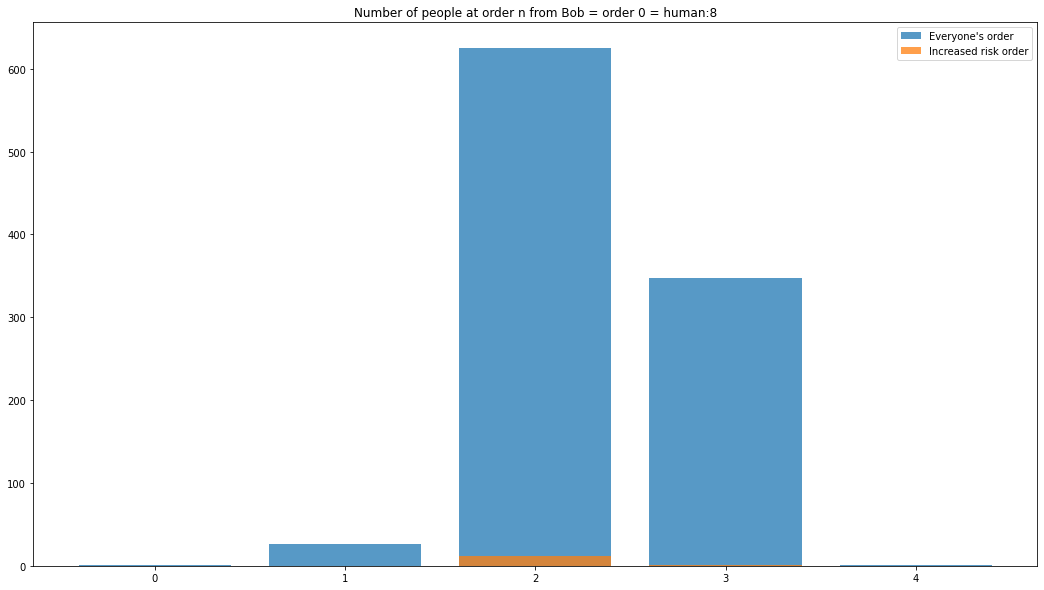

In [177]:
fig = plt.figure()
plt.bar(list(range(len(orders))), list(map(len, orders)), alpha=0.75, label="Everyone's order")
plt.bar(list(range(len(orders))), list(map(len, risky_orders)), alpha=0.75, label="Increased risk order")
plt.legend()
t = plt.title("Number of people at order n from Bob = order 0 = " + bob)

In [179]:
risky_orders

[set(),
 set(),
 {'human:203',
  'human:368',
  'human:370',
  'human:371',
  'human:437',
  'human:452',
  'human:602',
  'human:709',
  'human:738',
  'human:762',
  'human:773',
  'human:797'},
 {'human:417'},
 set()]

## Order-based risk change distribution

In [180]:
from collections import Counter

risk_levels_per_order = [[]]
for order in risky_orders:
    if order == set([bob]):
        continue
    all_risks = []
    for h in order:
        all_risks += [r["risk_level"] for r in ra_per_name_per_ts[h].values()]
    risk_levels_per_order.append(all_risks)


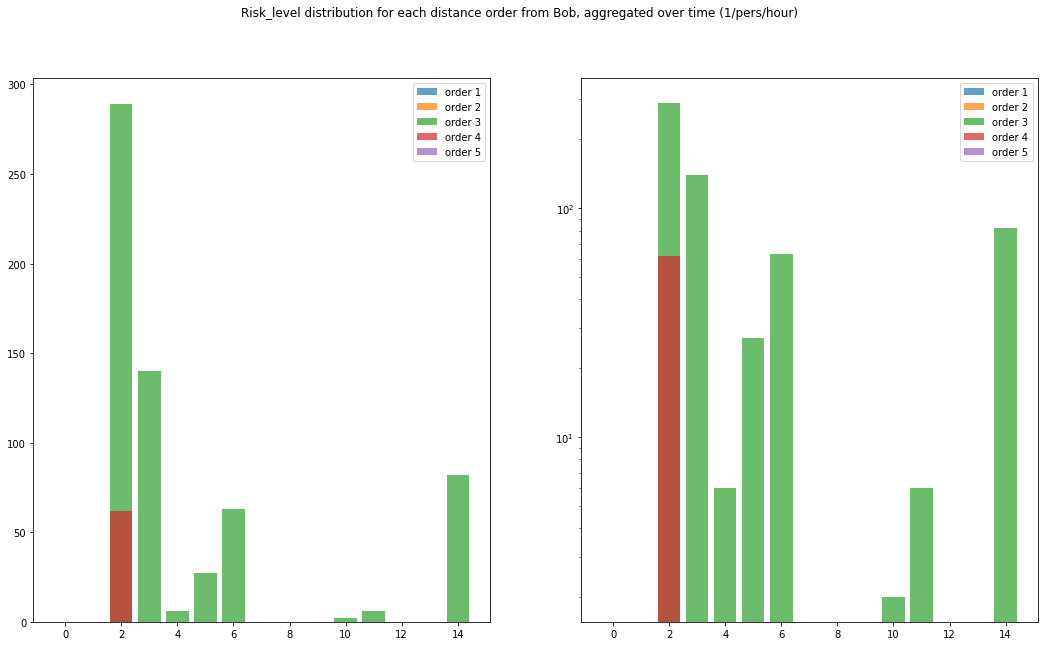

In [181]:
fig, axs = plt.subplots(1,2)
for i, risks in enumerate(risk_levels_per_order):
    if i == 0:
        continue
    c = {i:0 for i in range(15)}
    for r in risks:
        c[r] += 1
    axs[0].bar(range(15), c.values(), label="order {}".format(i), alpha=0.7)
    axs[1].bar(range(15), c.values(), label="order {}".format(i), alpha=0.7)

axs[1].set_yscale("log")
axs[0].legend()
axs[1].legend()
t = fig.suptitle("Risk_level distribution for each distance order from Bob, aggregated over time (1/pers/hour)")

## Bob's messages

In [182]:
upd = data["bob_messages"]
upd_post_bob = {
    name: {
        date: encs
        for date, encs in dates.items()
        if date >= datetime.datetime(2020, 3, 8, 0, 0)
    }
    for name, dates in upd.items()
}

In [183]:
bob_updates = {
    name: {
        date: [e for e in encs if e[-1] == bob]
        for date, encs in dates.items() 
        if any(e[-1] == bob for e in encs)
    }
    for name, dates in upd_post_bob.items()
}
bob_updates = {k: v for k, v in h8_updates.items() if v}

In [184]:
received_bob_message = defaultdict(list)
for name, dates in bob_updates.items():
    for date, encs in dates.items():
        received_bob_message[date.date()].append([(name, e) for e in encs])

In [185]:
print("Messages sent by Bob:\n")
for d in sorted(received_bob_message):
    print(d)
    print("\n".join(str(l[0]) for l in h8_messages[d]))
    print()

Messages sent by Bob:

2020-03-08
('human:7', [14, 8, 7, 6, 8, 'human:8'])
('human:89', [15, 3, 8, 5, 8, 'human:8'])
('human:89', [15, 4, 3, 5, 8, 'human:8'])
('human:91', [15, 3, 8, 5, 8, 'human:8'])
('human:91', [15, 4, 3, 5, 8, 'human:8'])
('human:6', [14, 8, 7, 6, 8, 'human:8'])
('human:23', [15, 4, 3, 5, 8, 'human:8'])
('human:90', [15, 3, 8, 5, 8, 'human:8'])
('human:90', [15, 4, 3, 5, 8, 'human:8'])
('human:48', [15, 3, 8, 5, 8, 'human:8'])
('human:48', [15, 4, 3, 5, 8, 'human:8'])
('human:58', [15, 3, 8, 5, 8, 'human:8'])
('human:58', [15, 4, 3, 5, 8, 'human:8'])
('human:5', [14, 8, 7, 6, 8, 'human:8'])
('human:14', [15, 4, 3, 5, 8, 'human:8'])
('human:15', [15, 4, 3, 5, 8, 'human:8'])
('human:32', [15, 3, 8, 5, 8, 'human:8'])
('human:32', [15, 4, 3, 5, 8, 'human:8'])
('human:53', [15, 3, 8, 5, 8, 'human:8'])
('human:53', [15, 4, 3, 5, 8, 'human:8'])
('human:12', [15, 3, 8, 5, 8, 'human:8'])
('human:12', [15, 4, 3, 5, 8, 'human:8'])
('human:56', [15, 3, 8, 5, 8, 'human:8'])
('h

In [186]:
n_bob_messages_per_human = defaultdict(int)
for v in received_bob_message.values():
    for l in v:
        for contact in l:
            if contact[1][-1] == bob:
                n_bob_messages_per_human[contact[0]] += 1

In [187]:
n_bob_messages_per_order = defaultdict(int)
for h, count in n_bob_messages_per_human.items():
    n_bob_messages_per_order[human_orders[h]] += count

In [188]:
all_messages_per_day = defaultdict(list)
for name, dates in upd_post_bob.items():
    for date, encs in dates.items():
        all_messages_per_day[date.date()].append([(name, e) for e in encs])
all_messages_per_day = {k: list(filter(len, v)) for k, v in all_messages.items()}

In [189]:
# for k, v in all_messages_per_day.items():
#     print(k, len(v))
#     print(v[0])
#     break

In [190]:
count_per_human = defaultdict(int)
for day_messages in all_messages_per_day.values():
    for m in day_messages:
        if len(m):
            count_per_human[m[0][0]] += len(m)

In [191]:
count_per_order = {i: 0 for i in range(len(orders))}

for h, c in count_per_human.items():
    count_per_order[orders_dict[h]] += c

Text(0.5, 1.0, 'Total number of messages received per distance order to Bob')

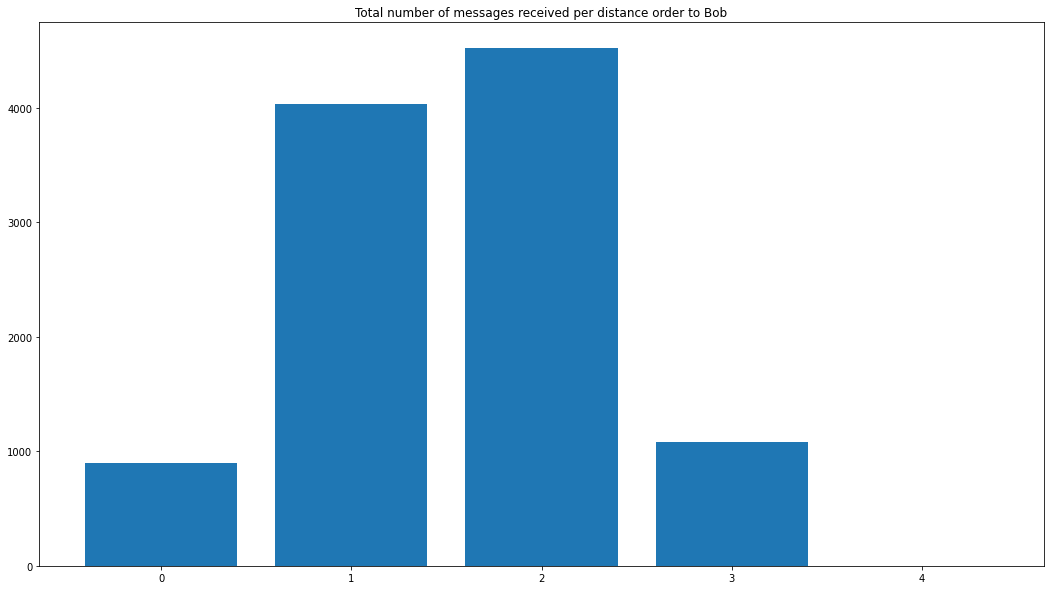

In [192]:
plt.bar(count_per_order.keys(), count_per_order.values())
plt.title("Total number of messages received per distance order to Bob")

**Todo**:
* remap to 8 levels
* run 1000 ppl